# TKT4108 Structural dynamics 2

## Solution Exercise 4

**Main topics:** Transmission of random variables, extreme response

**References:** Newland Chapter 6-7

**Hint**: Take a look at the examples posted on Github

### Problem 2: Response statistics

In this problem we will consider the single degree of freedom system shown below. The system consists of a rigid beam with distributed mass $m$ kg/m, a point mass $M=mL$, a spring with stiffness $k$ and a dashpot damper with damping coefficient $c$. 

The system is simply supported in one end as shown in the figure and is subjected to a stochastic load $x(t)$ defined by the spectral density 

$$ S_x(\omega) = \frac{2000\alpha}{2\pi\left(\alpha^2 + \omega^2\right)}  $$

Assume $\alpha$=1

<img src="rod.svg">

a) Obtain the equation of motion for the system. The distributed mass, $m$ is 100 kg/m, the point mass is $M=300 kg$, the length $L$ is 3m and the natural frequency $f_n$ is 1 Hz and the damping ratio, $\xi$ is 0.02. Use this information to calculate $c$ and $k$

#### Solution

We start by drawing a free body diagram where the structure is in motion

<img src="rod_fbd.svg">

We can then consider the moment equilibrium about the support in the left end of the bar

$$ \sum M = 0  $$

$$ x(t)L - M\ddot{y}L - k\frac{y}{L}\frac{2}{3}L\frac{2}{3}L - c \frac{\dot{y}}{L}\frac{1}{3}L\frac{1}{3}L - \frac{1}{2}m\ddot{y}L \frac{2}{3}L = 0 $$

$$ M\ddot{y} + k\frac{y}{L}\frac{2}{3}L\frac{2}{3} + c \frac{\dot{y}}{L}\frac{1}{3}L\frac{1}{3} + \frac{1}{2}mL\ddot{y} \frac{2}{3} = x(t) $$

$$ \left( M + \frac{2}{6}mL \right)\ddot{y} + \frac{1}{9} c \dot{y} +\frac{4}{9} k y  = x(t) $$

The natural frequency of the system is defined as

$$ f_n = \frac{1}{2\pi}\sqrt{\frac{\frac{4}{9} k}{\left( M + \frac{2}{6}mL \right)}}  $$

$$ k = \frac{9}{4}\left(2\pi f_n\right)^2 \left( M + \frac{2}{6}mL \right) $$

$$ k = \frac{9}{4}\left(2\pi 1\right)^2 \left( 300 + \frac{2}{6}100 \cdot 3\right) $$

$$ k = 3600 \pi^2 $$

The damping ratio of the system is defined as

$$ \xi = \frac{\frac{1}{9} c}{2\left( M + \frac{2}{6}mL \right)\omega_n} $$

$$ c = 2 \cdot 9  \left( M + \frac{2}{6}mL \right)\omega_n \xi$$

$$ c = 2 \cdot 9  \left( M + \frac{2}{6}mL \right) 2\pi f_n \xi$$

$$ c = 2 \cdot 9  \left( 300 + \frac{2}{6}100 \cdot 3 \right) 2\pi \cdot 1 \cdot 0.2$$

$$ c = 288 \pi $$



b) Plot the spectral density of the stochastic load and calculate its variance




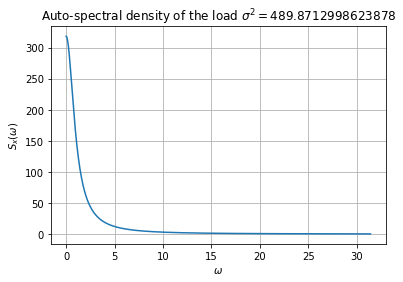

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as sps

w = np.linspace(0,5*2*np.pi,1000)
alpha0 = 1
S_x = 2000*alpha0/(2*np.pi*(alpha0**2+w**2))

variance_load = np.trapz(S_x,w)

plt.figure()
plt.plot(w,S_x)
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$S_x(\omega)$")
plt.title("Auto-spectral density of the load $\sigma ^2=$" + str(variance_load));


c) Calculate the auto-spectral density of the response

#### Solution

The auto-spectral density of the response is defined as

$$S_y(\omega) = \bar{H}(\omega) S_x(\omega) H(\omega) $$



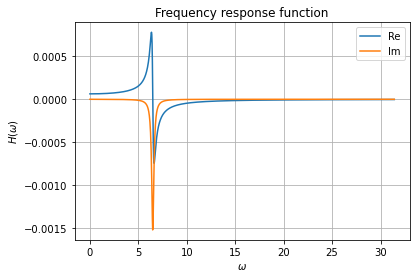

In [2]:
# Frequency response matrix
M = 300
m=100
L = 3
c = 288*np.pi
k = 3600*np.pi**2

H = 1/(-w**2*(M + 2/8*m*L) + 1j*w*1/9*c + 4/9*k)

plt.figure()
plt.plot(w,np.real(H),label="Re")
plt.plot(w,np.imag(H),label="Im")
plt.grid()
plt.ylabel("$H(\omega)$")
plt.xlabel("$\omega$")
plt.title("Frequency response function")
plt.legend()



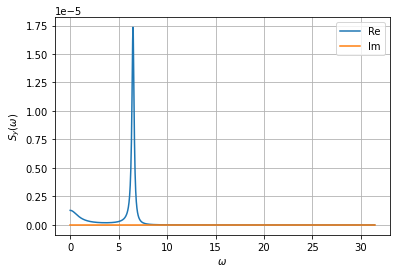

In [3]:
S_y = np.conj(H) * S_x * H
plt.figure()
plt.plot(w,np.real(S_y),label="Re")
plt.plot(w,np.imag(S_y),label="Im")
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$S_y(\omega)$")
plt.legend();

d) Obtain the probability density function for the spring force

#### Solution

The spring force is defined as

$$f_s = k\frac{y}{L}\frac{2}{3}L =  \frac{2}{3} k y  $$

The auto-correlation function of the spring force can be obtained by

$$R_{f_s}(\tau) = E\left[f_s(t)f_s(t+\tau) \right] $$

$$R_{f_s}(\tau) = \left(\frac{2}{3} k \right)^2 E\left[y(t)y(t+\tau) \right] $$

$$R_{f_s}(\tau) = \left(\frac{2}{3} k \right)^2 R_y(\tau) $$

The auto-spectral density is obtained by taking the Fourier transform

$$S_{f_s}(\tau) = \left(\frac{2}{3} k \right)^2 S_y(\tau) $$


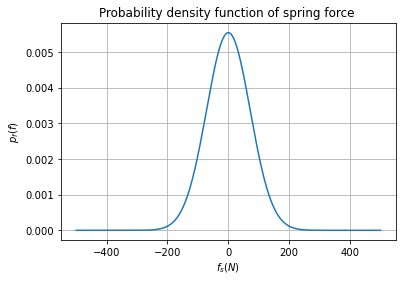

In [4]:
S_fs = (2/3*k)**2*S_y
std_fs = np.real(np.trapz(S_fs,w))**0.5 # Standard deviation of the response

y = np.linspace(-500,500,1000)
y_pdf = sps.norm.pdf(y,0,std_fs) #Probability density function of the load.

plt.figure()
plt.plot(y,y_pdf)
plt.grid()
plt.xlabel(r'$f_s (N)$')
plt.ylabel(r'$p_f(f)$')
plt.title("Probability density function of spring force ");


e) Obtain the Rayleigh probability density function of all peaks of the spring force

#### Solution

The probability distribution of all response peaks is obtained by considering the number of peaks that crosses a threshold $a$ divided by the total number of peaks. The up-crossing rate for a Gaussian stochastic process is defined by

$$v_y^+(a) = \frac{1}{2\pi} \frac{\sigma_{\dot{y}}}{\sigma_y}\exp\left[- \frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2 \right] $$

It is thus straightforward to obtain the expected number of peaks being higher than $a$. Getting the total number of peaks is more complicated. A response process for a lightly damped linear system is narrowly banded since the response is dominated by frequency content close to the natural frequency of the dynamic system. An ideal narrow banded response has one peak per zero crossing. We can then approximate the total number of peaks as the number of zero crossings. The mean zero upcrossing rate is defined as 
. 
$$v_y^+(0) = \frac{1}{2\pi} \frac{\sigma_{\dot{y}}}{\sigma_y} $$

The probability of a peak  higher than the threshold $a$ is thus

$$P\{y_p>a\} = \frac{v_y^+(a)}{v_y^+(0)}$$

We are interested in the probability distribution function, which is the probability of the response being less or equal to the threshold. This is the complement to the event above.

$$P\{y_p<a\} = 1- \frac{v_y^+(a)}{v_y^+(0)}$$

Inserting the expressions for the up-crossing rates 

$$P_a(a) = 1- \exp\left[ -\frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2 \right]$$

We are asked to obtain the probability density function, which is the derivative of the probability distribution.

$$ p_a(a) = \frac{\partial P_a(a)}{\partial a} = \frac{a}{\sigma_y^2} 
\exp\left[ -\frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2\right]$$


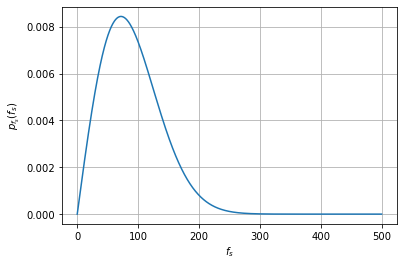

In [20]:
a = np.linspace(0,500,1000)

pa = a/std_fs**2 * np.exp(-0.5*(a/std_fs)**2)

plt.figure()
plt.plot(a,pa)
plt.grid()
plt.xlabel("$f_s$")
plt.ylabel("$p_{f_s}(f_s)$");


f) Obtain the Gumbel probability density function of the largest spring force for a time period of 24 hours

#### solution

The probability distribution of the largest peak in an interval of duration $T$ follows a Poisson distribution. 

$$ P_{Ma}(a)=Prob\{ max\{ y(t), 0 \le t \le T \} \le a \} = \exp \left[-v_y^+(a)T \right] $$

Here the up-crossing rate is defined by

$$v_y^+(a) = \frac{1}{2\pi} \frac{\sigma_{\dot{y}}}{\sigma_y}\exp\left[ -\frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2 \right] $$

The probability density function is obtained by taking the derivative of the probability distribution function. 

$$ p_{Ma}(a) = \frac{\partial P_{Ma}(a)}{\partial a} $$

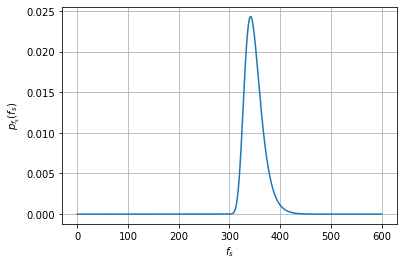

In [24]:
std_dot_fs = np.sqrt(np.real(np.trapz(w**2*S_fs,w)))
am = np.linspace(0,600,1000)
vy = 1/2/np.pi*std_dot_fs/std_fs*np.exp(-0.5*(am/std_fs)**2)
T = 24*60*60
Pma = np.exp(-vy*T)
pma = np.zeros(am.shape[0])
pma[0:pma.shape[0]-1] = np.diff(Pma)/(am[1]-am[0])

plt.figure(100)
plt.plot(am,pma)
plt.grid()
plt.ylabel('$p_{f_s}(f_s)$')
plt.xlabel('$f_s$');